In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
%matplotlib inline

Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
EDVisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
Merged = pd.merge(Patients, Discharges, on="PatientID")
aMerged = pd.merge(EDVisits, Discharges, on="PatientID")

###### Q1. Calculate Readmission Rate

In [13]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
sumreadmitflag = df['ReadmissionFlag'].sum()
totaladmit = df['AdmissionID'].count()
rate = sumreadmitflag/totaladmit
print('ReAdmissionRate = ', rate)

ReAdmissionRate =  0.26944444444444443


###### Q2. Calculate provider Patient Ratio

In [19]:
df = pd.merge(AmbulatoryVisits, Providers, on="ProviderID")
count_pat_mrn = df['PatientMRN'].nunique()
count_pro_nam = df['ProviderName'].nunique()
prov_pat_ratio=count_pat_mrn/count_pro_nam
print("provider Patient Ratio is",prov_pat_ratio)

provider Patient Ratio is 6.825


###### Q3. Analysis of Expired, Transfer and Home patients with Expected Mortality based on various Service

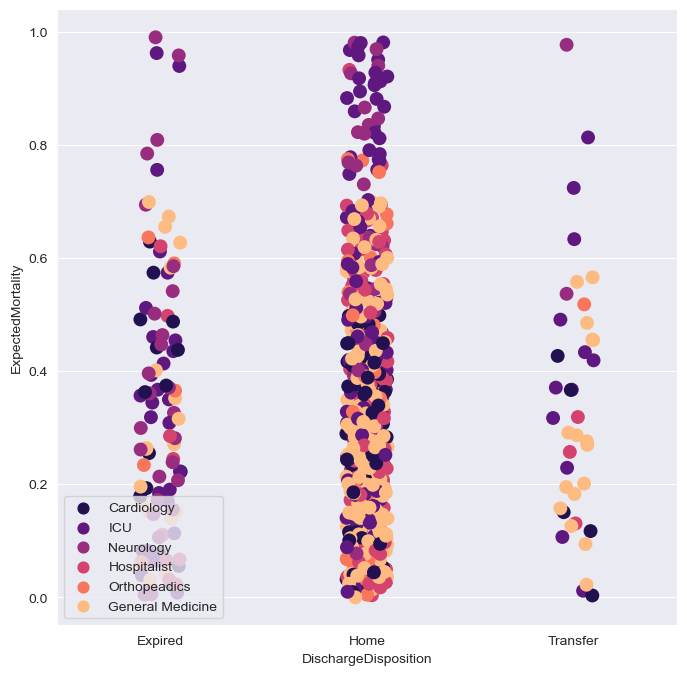

In [12]:
import seaborn as sns
plt.figure(figsize=(8,8)) 
sns.set_style('darkgrid')

sns.stripplot(x='DischargeDisposition',y='ExpectedMortality',data=Discharges,hue='Service',size=10, palette='magma')
plt.legend(loc=3)

###### Q4. BloodPressureSystolic Vs BloodPressureDiastolic

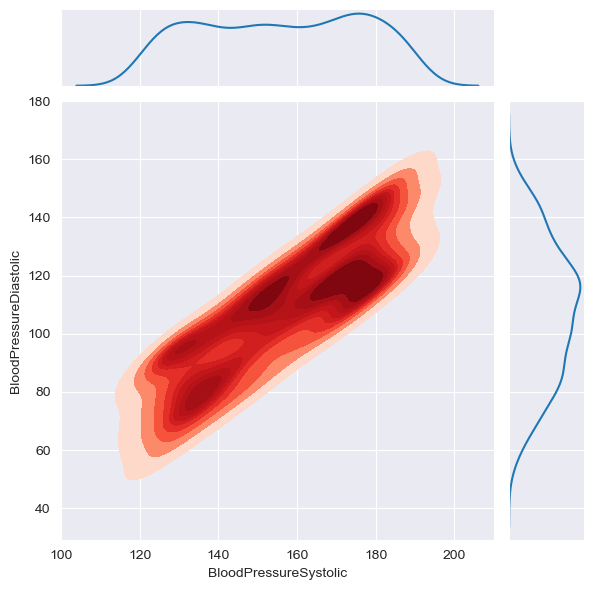

In [21]:
AmbulatoryVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "AmbulatoryVisits")
sns.jointplot(data=AmbulatoryVisits, x='BloodPressureSystolic', y='BloodPressureDiastolic', kind='kde', 
              cmap='Reds', shade=True)

###### Q5. For Visit type: 'follow up', what was the different visit-status by patient count.

In [22]:
AmbVisit_df= pd.DataFrame(AmbulatoryVisits, columns=['VisitType','VisitStatus','PatientMRN'])
#wherevisitType=follow up
PCountbyStatus = AmbVisit_df[AmbVisit_df['VisitType']=='Follow Up'].groupby(['VisitStatus']).size().reset_index(name='count')
display(PCountbyStatus)


,VisitStatus,count
0,Canceled,29
1,Completed,266
2,No Show,41


###### Q6. Show different providers - by patients count, for the visit status completed.

In [27]:
Providers_df= pd.DataFrame(Providers, columns=['ProviderName','ProviderID'])
Provider_AmbVisits = pd.merge(Providers_df, AmbulatoryVisits, on='ProviderID' )

ProviderNmCompletedStatus =Provider_AmbVisits[Provider_AmbVisits['VisitStatus']=='Completed']
ProviderPatientCount= ProviderNmCompletedStatus.groupby(['ProviderName'],as_index=False,)['PatientMRN'].count()
SortedProviderPatient=ProviderPatientCount.sort(by='Count', ascending=False)
display(SortedProviderPatient)
#display(ProviderPatientCount)

AttributeError: 'DataFrame' object has no attribute 'sort'

###### Q7. For a visit type, find average days to get appointment.

In [52]:
AmbVisit_df= pd.DataFrame(AmbulatoryVisits, columns=['DateofVisit','DateScheduled', 'VisitType'])

#print(AmbVisit_df)
AmbVisit_df['DateofVisit']= pd.to_datetime(AmbVisit_df['DateofVisit'])
AmbVisit_df['DateScheduled']= pd.to_datetime(AmbVisit_df['DateScheduled'])
AmbVisit_df['Days to Schedule'] = (AmbVisit_df['DateofVisit'] - AmbVisit_df['DateScheduled']).dt.days

AvgDaysToSchd = AmbVisit_df.groupby('VisitType')['Days to Schedule'].mean()

print(AvgDaysToSchd.loc[1:1])
# Plot results
#AvgDaysToSchd.plot(kind='violin', alpha=.5,)
sns.set_theme(style="whitegrid")
Ax=sns.violinplot(x='VisitType', y='AvgDaysToSchd', data=AmbVisit_df, palette="coolwarm")
#sns.swarmplot(data=AmbVisit_df,x='VisitType',y='AvgDaysToSchd')

TypeError: cannot do slice indexing on Index with these indexers [1] of type int